### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
cc=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
cc.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [519]:
cc.shape

(32560, 15)

In [520]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [521]:
cc.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [522]:
cc.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

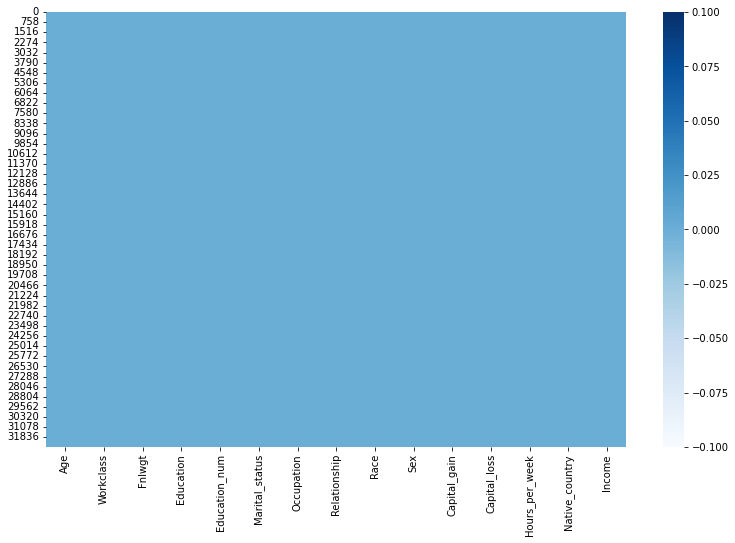

In [523]:
plt.figure(figsize=[13,8])
sns.heatmap(cc.isnull(),cmap='Blues')

## Observation-1

In the above dataset :

1) The size of table is 32560* 15 i.e. no. of rows are 32560 and no. of columns are 15(including target).

2) Out of 15 columns 9 columns are object type in nature and rest 6 are numeric type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap so there is no need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format

# EDA
### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


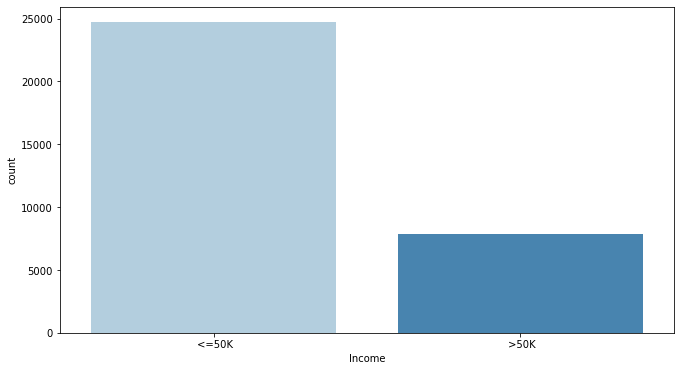

In [524]:
print(cc['Income'].value_counts())  
plt.figure(figsize=[11,6])
sns.countplot(cc['Income'],palette='Blues')
plt.show()

 Male      21789
 Female    10771
Name: Sex, dtype: int64


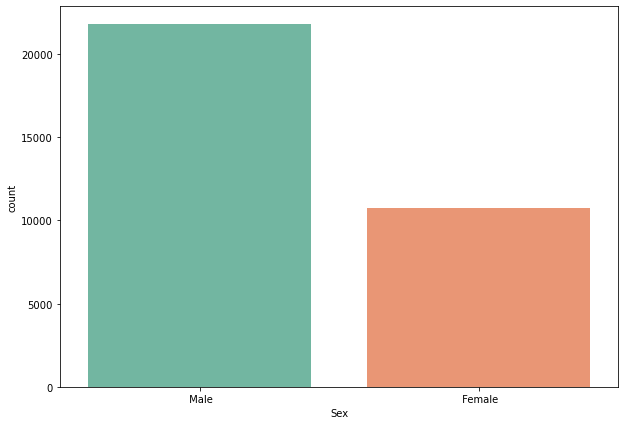

In [525]:
print(cc['Sex'].value_counts())  
plt.figure(figsize=[10,7])
sns.countplot(cc['Sex'],palette='Set2')
plt.show()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


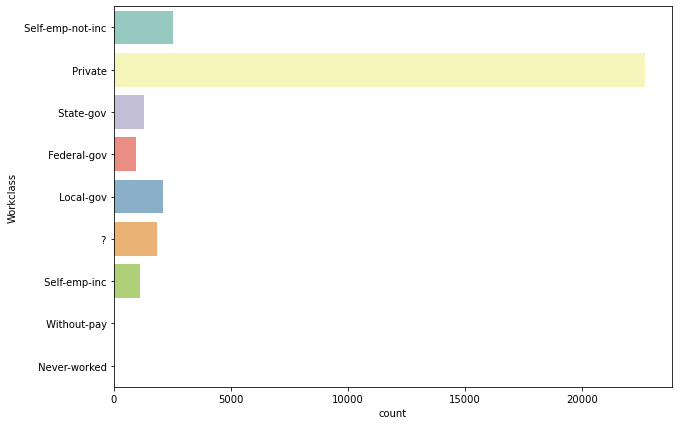

In [526]:
print(cc['Workclass'].value_counts())  
plt.figure(figsize=[10,7])
sns.countplot(y=cc['Workclass'],palette='Set3')
plt.show()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:ylabel='Education'>

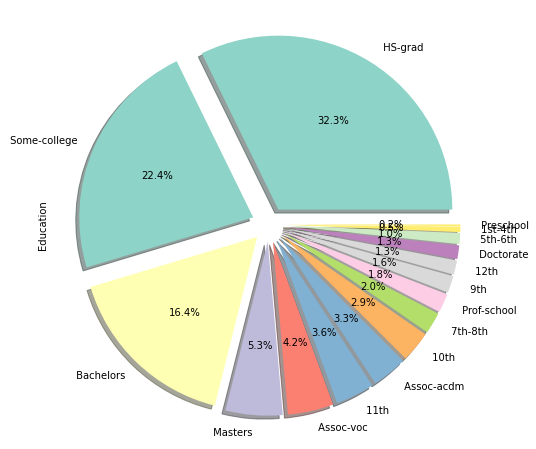

In [527]:
print(cc['Education'].value_counts()) 
cc['Education'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',cmap='Set3',figsize=(8,8))

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


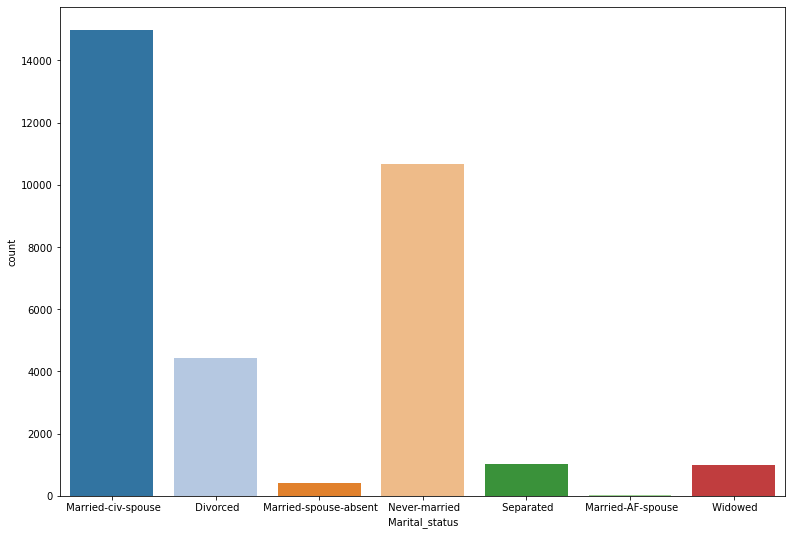

In [528]:
print(cc['Marital_status'].value_counts())  
plt.figure(figsize=[13,9])
sns.countplot(cc['Marital_status'],palette='tab20')
plt.show()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

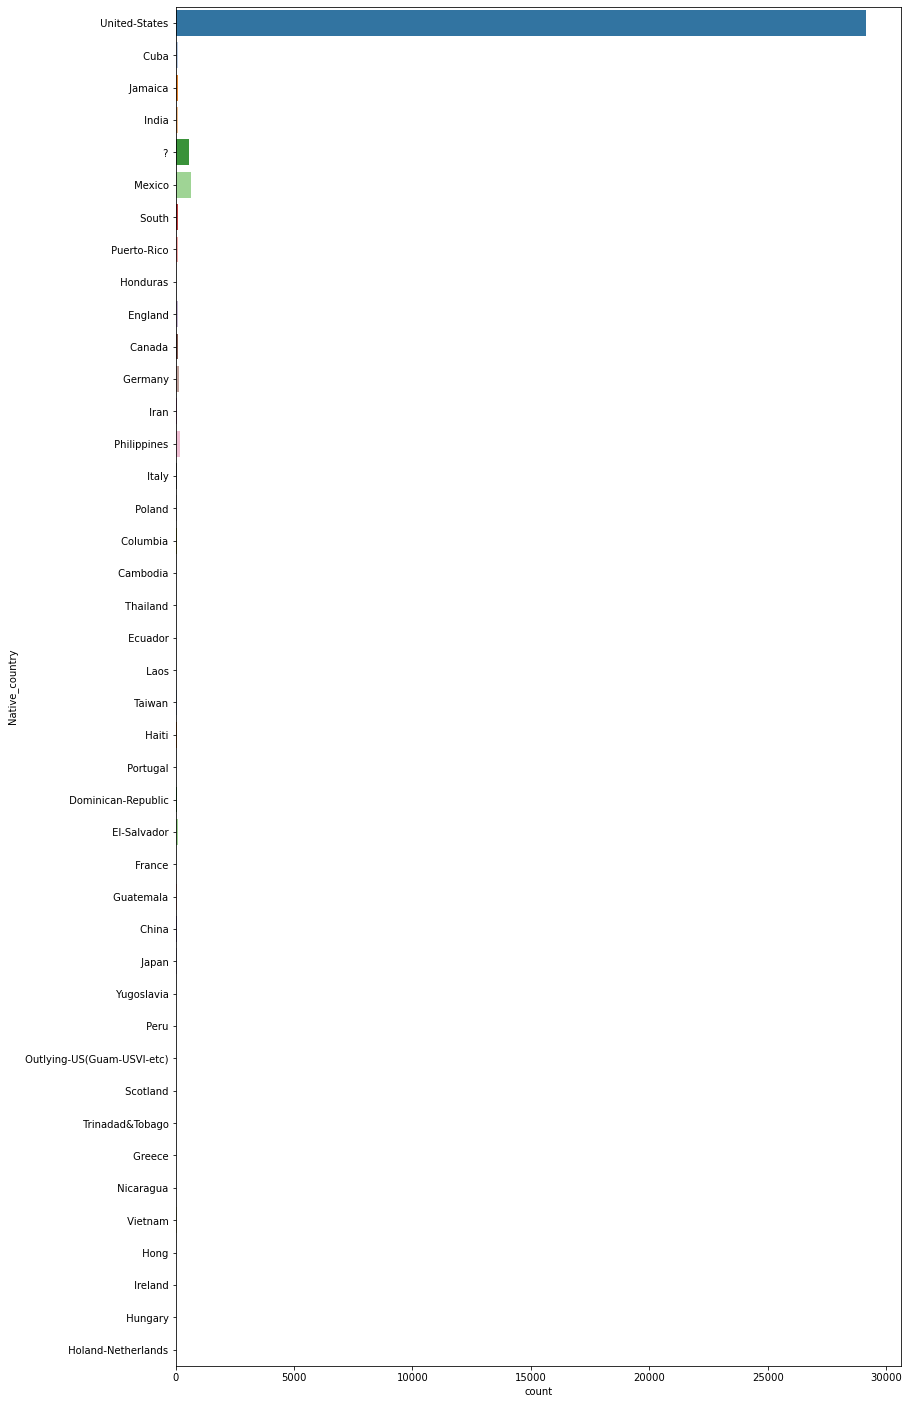

In [529]:
print(cc['Native_country'].value_counts())  
plt.figure(figsize=[13,25])
sns.countplot(y=cc['Native_country'],palette='tab20')
plt.show()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


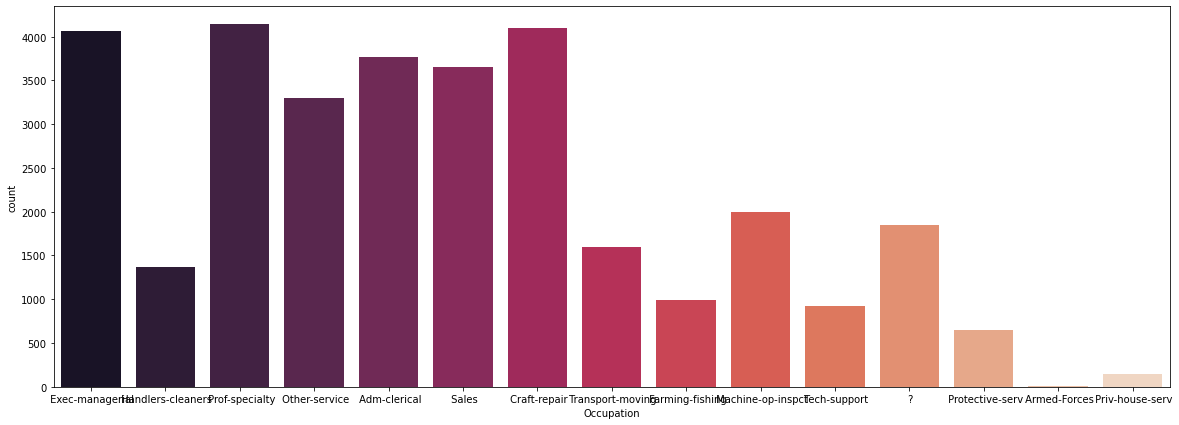

In [530]:
print(cc['Occupation'].value_counts())  
plt.figure(figsize=[20,7])
sns.countplot(cc['Occupation'],palette='rocket')
plt.show()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:ylabel='Relationship'>

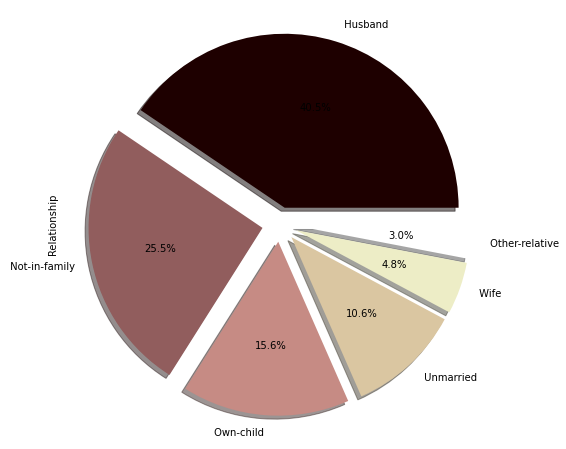

In [531]:
print(cc['Relationship'].value_counts())  
cc.Relationship.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',figsize=(8,8),cmap='pink')

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


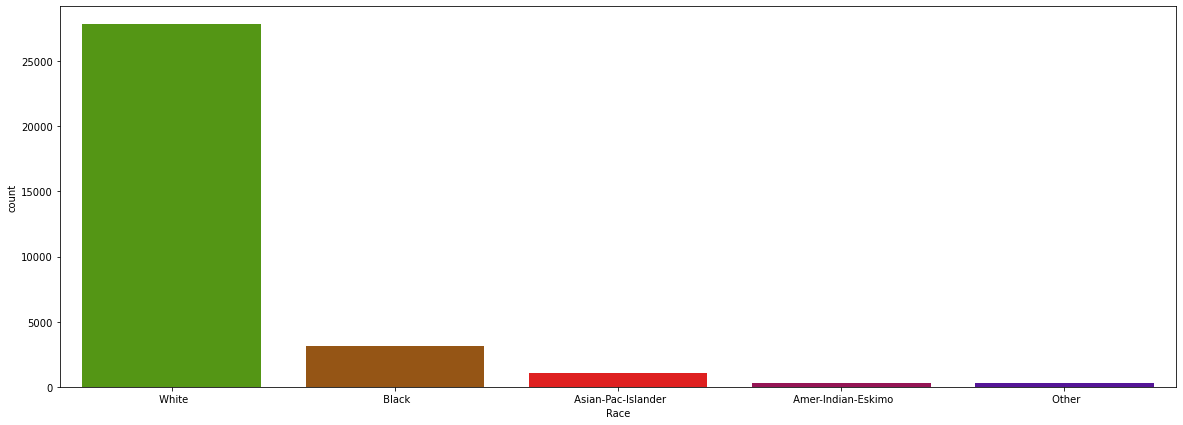

In [532]:
print(cc['Race'].value_counts())  
plt.figure(figsize=[20,7])
sns.countplot(cc['Race'],palette='brg_r')
plt.show()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


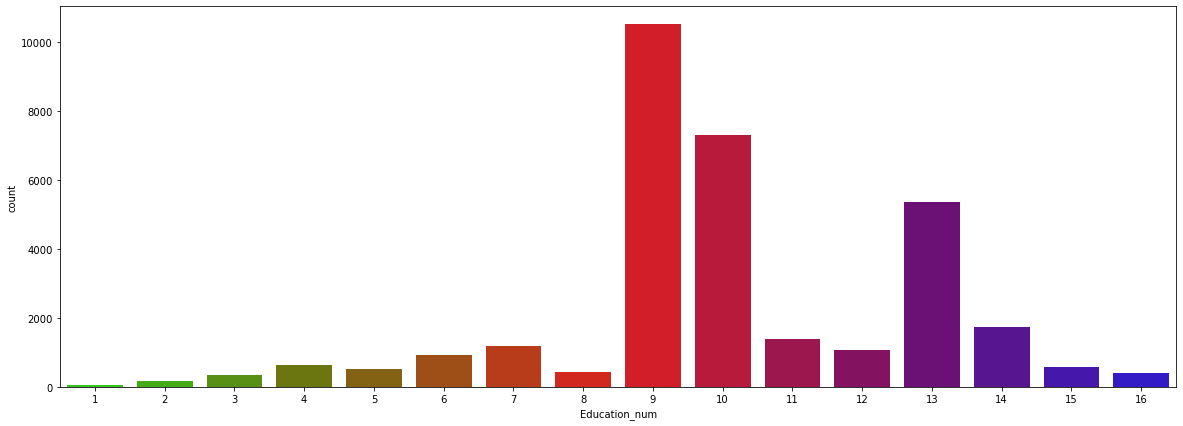

In [533]:
print(cc['Education_num'].value_counts())  
plt.figure(figsize=[20,7])
sns.countplot(cc['Education_num'],palette='brg_r')
plt.show()

## Observation-2

From the above graphs we can make a conclusion that:

1) The population of those people who are earning less than or equal to 50,000 are more in numbers and we can say that most of the people earn less then 50,000 $.
   many less people are their who are earning greater then 50,000 $

2) The population of male is high as compare to female, in numbers it is arround 21789 and 107710 resp. 

3) In the work class column, the number of private workers is highest(22696),  and self emp not inc has the second highest population around 2541.Local and state govt. employee population is 2093 and 1297. Without pay employee are 14 in numbers.Never worked(7) people are also present but the population is negligible.

4) In the education column the HS grad holder's population is highest(10501) as compare to others. No of some college and bachelors are also high, in numbers it is 7291 and 5354 resp. The popuation of masters is less around 1723.

    11th and 12th pass popualtion is 1175 and 433 resp. it shows that the 12th pass population is very less.There are some doctorate people also but in numbers it is very less around 51.

5) The population of married-civ-spouse is highest, around 14976 and in the second number Never married people population is present(10682).Some people has devored(4443) and some separated(1025). Widowed are less in numbers but still present in numbers it is around 993. Married-AF-spouse is very less only 23 are recorded.

6) Most of the population is belongs to USA and the highest in numbers around 29169a scompare to others.
   Some people belongs to maxico, philippines, germany, canada, puerto rico, india, china and england.
   Few people are belongs to diffrent-diffrent country in numbers it is less than 50.
   
7) As we can see that the highest population is refer to Prof-specialty(4140), Craft-repair(4099), Exec-managerial(4066), Adm-clerical(3769), Sales(3650) and Other-service(3295) and above 3000 and rest population is devided into diffrent diffrent occupation and very less in numbers like Farming-fishing, it is arround 994, Tech-support has 928 and Protective-serv has 649 population.

8) Population of husband is more(13193) and the population of wife is less(1568), Unmarried people are also present, in numbers it is around 3446.

9) In the race column whit population is highest(27815), black population is high(3124) and asian-pac-islander(1039) and amer-indian-eskimo(311) poputalion is lower as comapre to highesta nd higher.

 
10) Education num is higher in 9,10 and 13.
    And very less in others education num.

## Checking Correlation 
#### we will check correlation in 2 ways
    1) Correlation between the columns
    2) Correlation of each columns with target column.

### 1) Correlation between the column

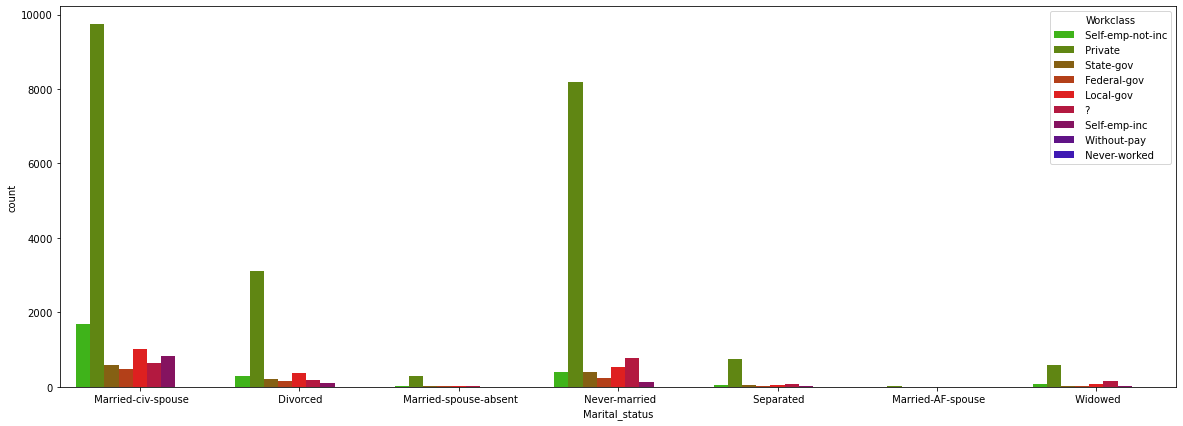

In [534]:
plt.figure(figsize=[20,7])
sns.countplot(cc['Marital_status'],hue=cc['Workclass'],palette='brg_r')
plt.show()

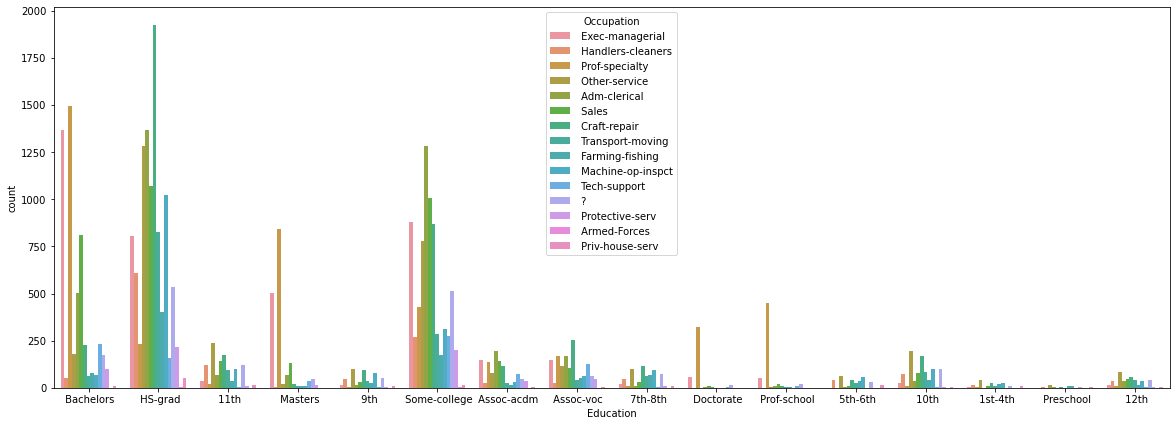

In [535]:
plt.figure(figsize=[20,7])
sns.countplot(cc['Education'],hue=cc['Occupation'])
plt.show()

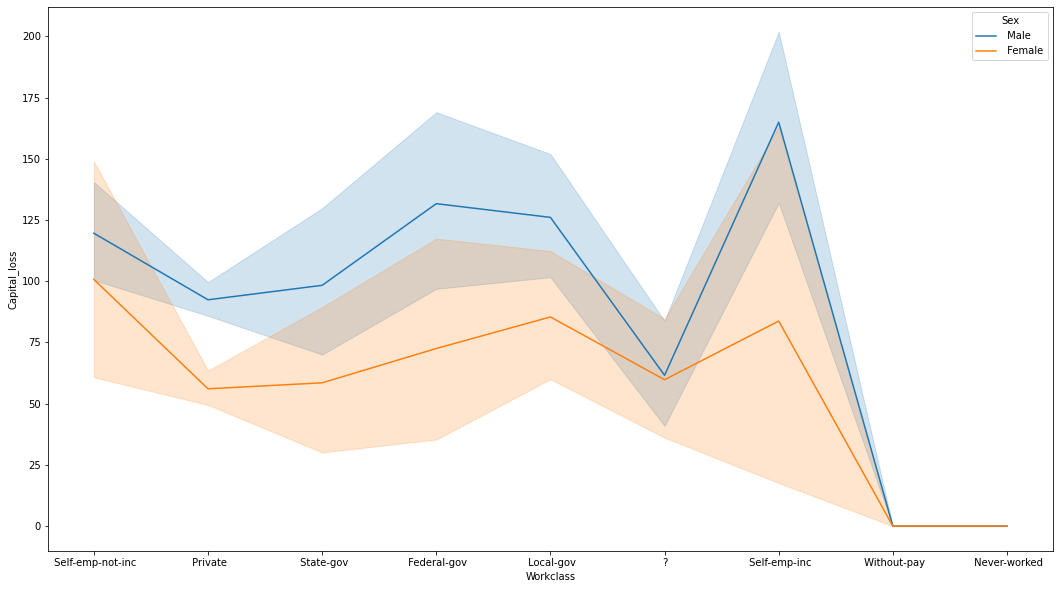

In [536]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Workclass", y="Capital_loss", hue='Sex', data=cc)
plt.show()

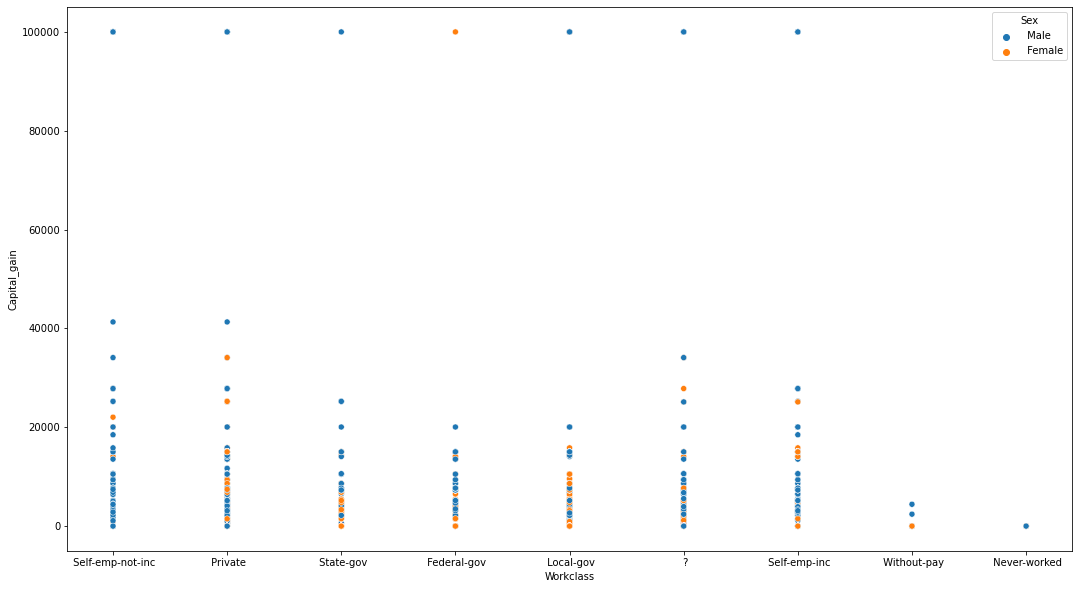

In [537]:
plt.figure(figsize=(18,10))
sns.scatterplot(y="Capital_gain", x="Workclass", hue='Sex', data=cc)
plt.show()

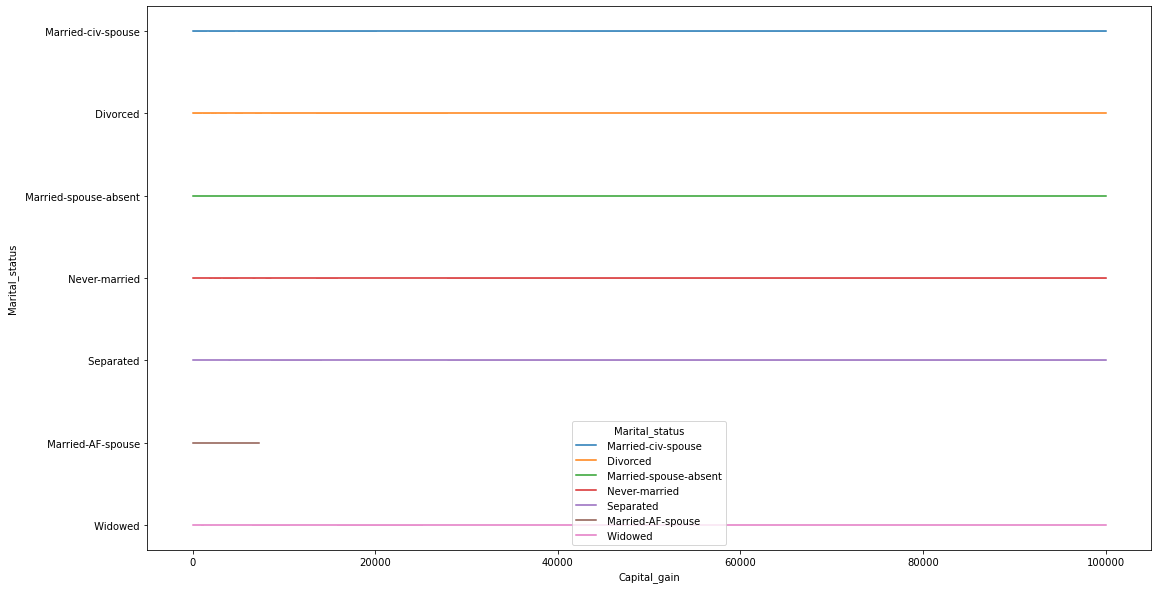

In [538]:
plt.figure(figsize=(18,10))
sns.lineplot(y="Marital_status", x="Capital_gain", hue='Marital_status', data=cc)
plt.show()

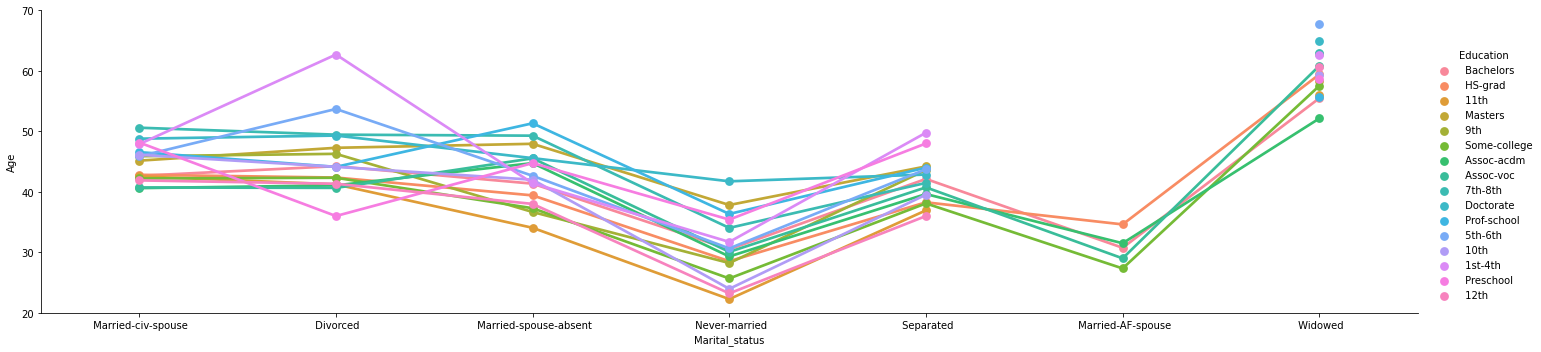

In [539]:
sns.factorplot(x = 'Marital_status', y = 'Age', hue = 'Education', data=cc, aspect= 4, ci=None)

### Observation-4

From the above observations we can say that :
    
    1) Male capital loss- The capital loss is high in self-emp-inc, federal and local goverment and less in state goverment and private sector and zero in without paid and never worked.
    
    2) Female capital loss- Female capital loss is less as comapre to male. self-emp-inc and local goverment has high capital loss and very less in others and zero in without paid and never worked.
    
    3) Male Capital gain- Capital gain is high in self emp not inc and private and less in federal , local and state goverment and zero in never worked and with out paid.
    
    4) Female capital gain-The capital gain is high in federal govt. and more in private and self-emp-inc and less in state govt,self emp not inc and zero in with out paid and never worked.
    
    5) Capital gain is higher in all the marital state only married AF spouse has the lessar capital gain.

In [540]:
from sklearn.preprocessing import LabelEncoder

In [541]:
le=LabelEncoder()

In [542]:
enc=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in enc:
    cc[i]=le.fit_transform(cc[i])

## Checking Outliers

In [543]:
cc.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

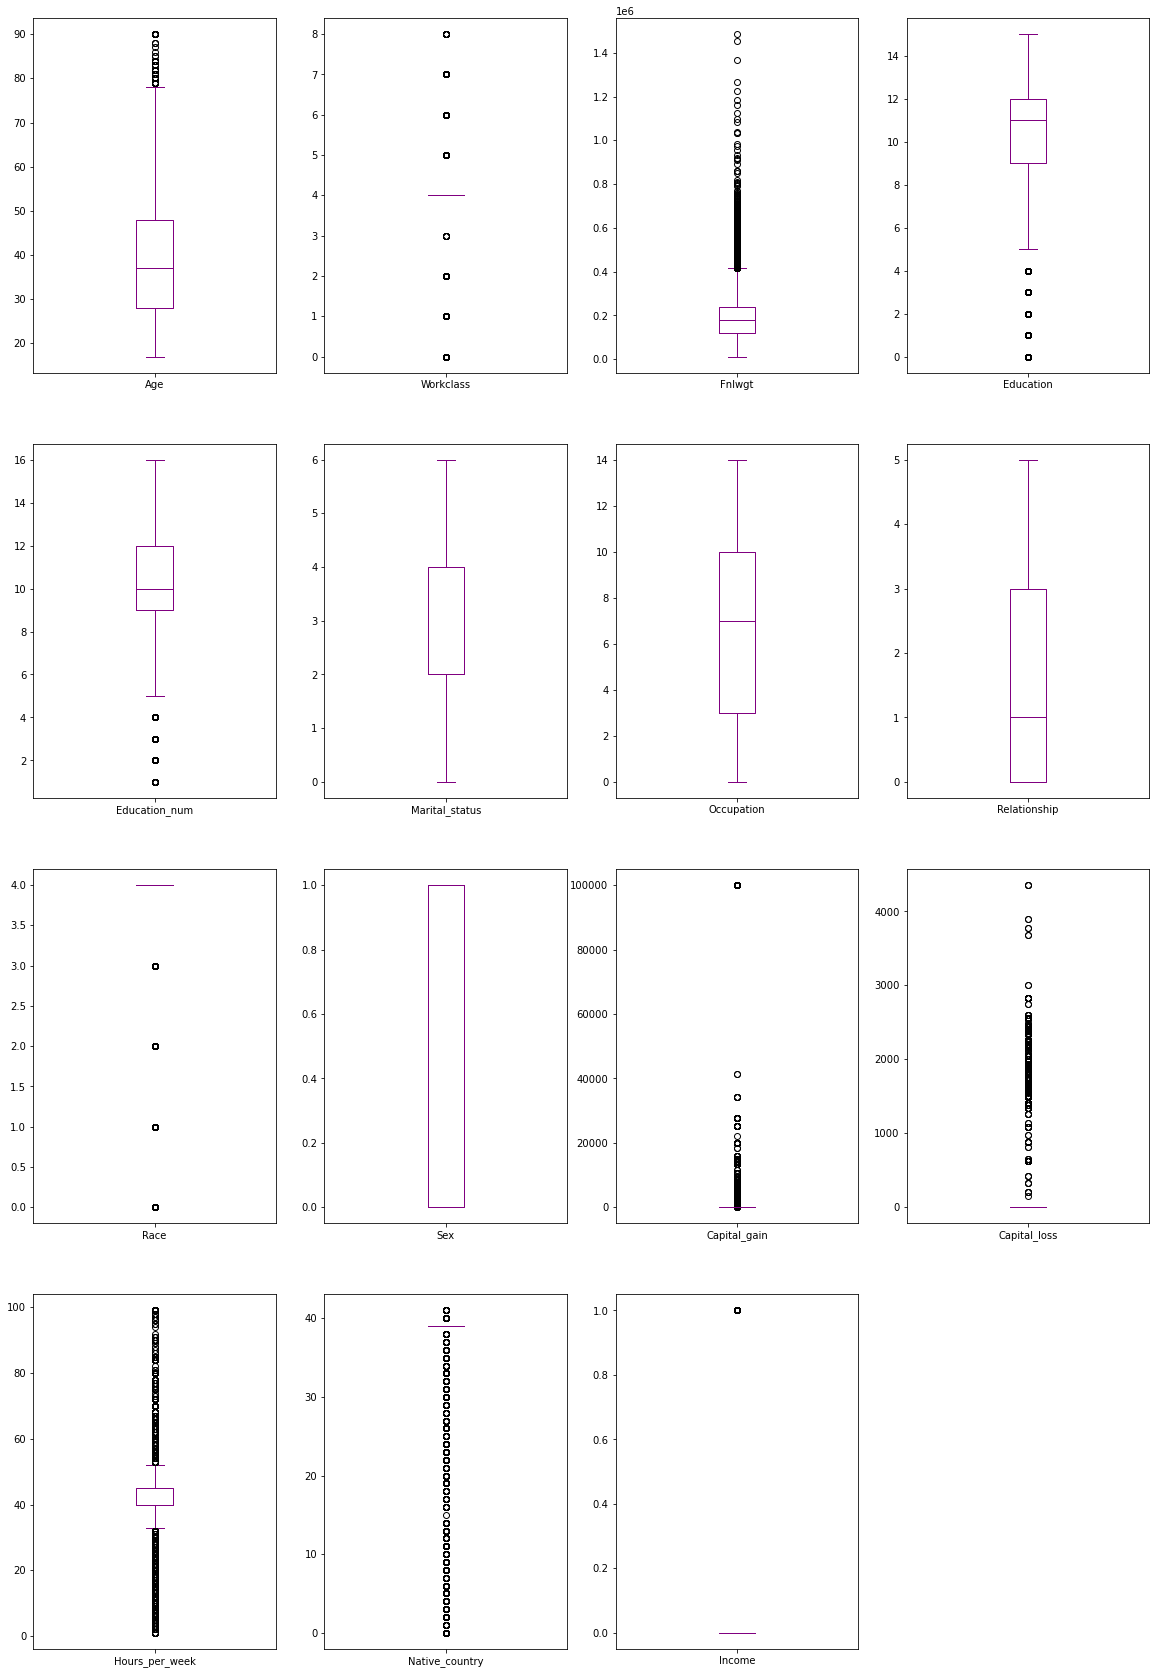

In [544]:
cc.plot(kind='box',subplots=True,figsize=[20,30],layout=(4,4),color='purple')

### Observation-5

As we can see in the above boxplot graphs and in description:

1) Age columns has outliers because the mean is 38 and std is 13 it means the data are highly spraded and also the diffrence between mean(38) and maximum(90) is very high which shows the presenness of outliers.

2) Fnlwgt and Native country column data have skewded data as we can see in the boxplot graph a large amount of outliers are present.

3) Similarly hours_per_week columns has outliers because thd diffrence between mean(40) and maximum value is(99) and also the standard deviation is high which shows the posibility of outliers are present.

4) Capital loss and capital gain columns have outliers.High standard deviation shows the high possibilities of outliers because the data are highly skewded in these columns.


## Checking skewness

In [545]:
from scipy.stats import skew

In [546]:
cc.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Age
0.5587118988154982


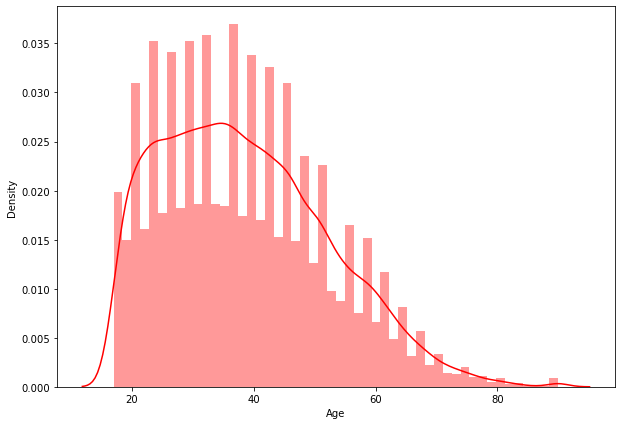

Workclass
-0.7522454408295943


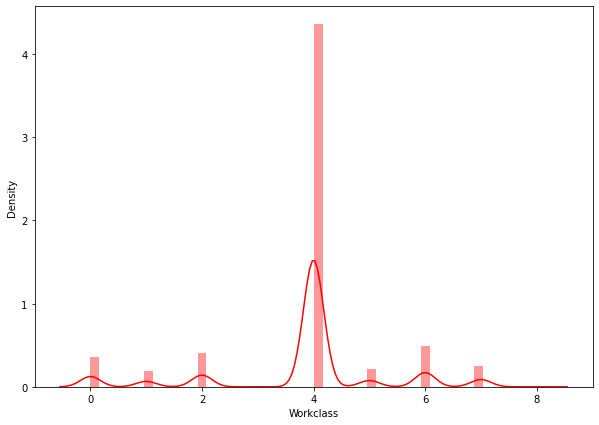

Fnlwgt
1.4469055818253151


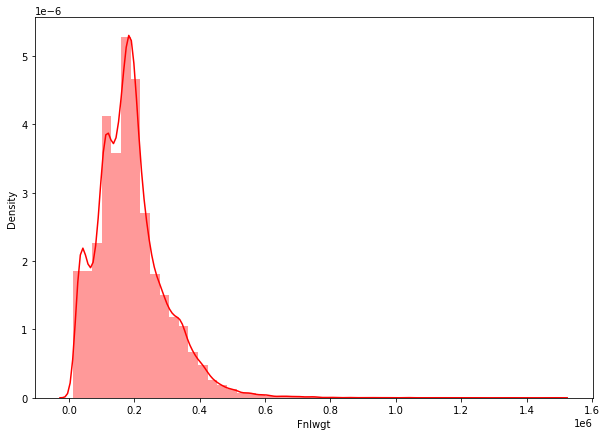

Education
-0.9340196537739126


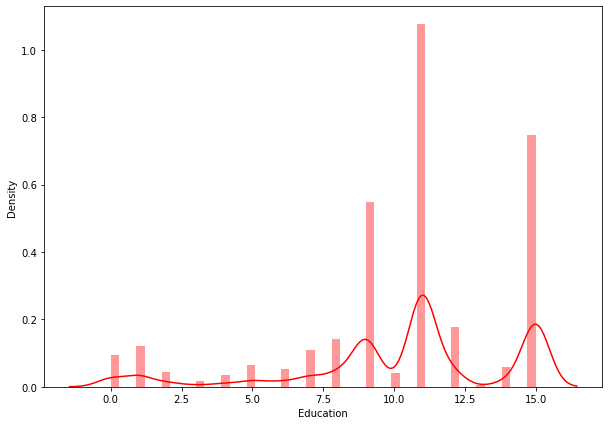

Education_num
-0.31161553498633193


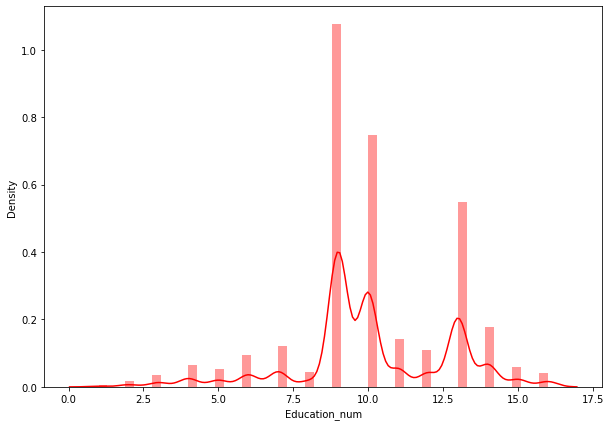

Marital_status
-0.013446962916864369


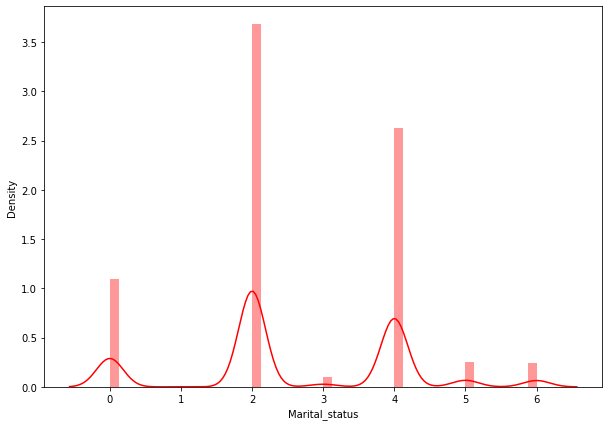

Occupation
0.11453431348441435


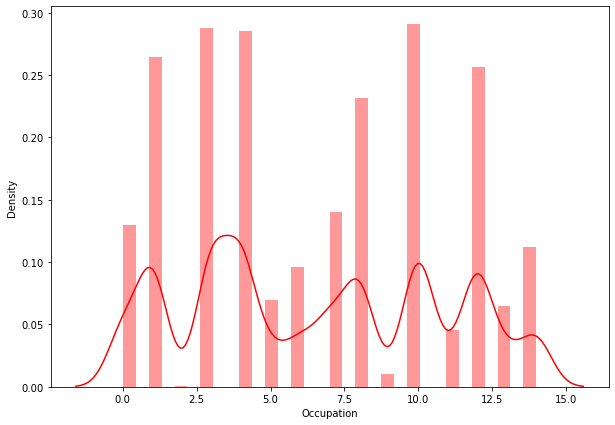

Relationship
0.7867473090814343


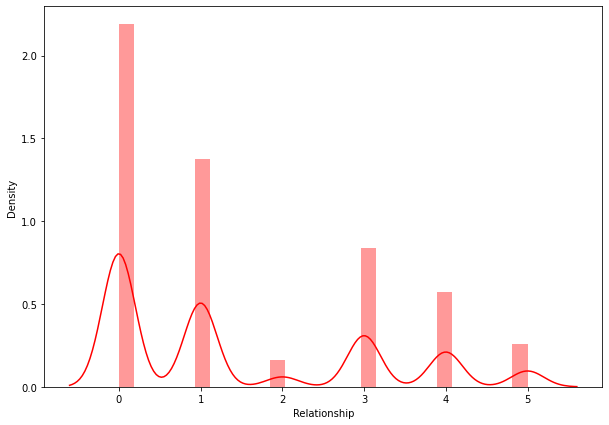

Race
-2.4352196663495116


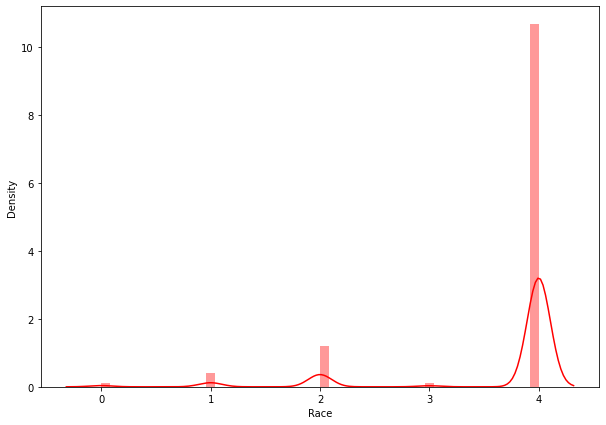

Sex
-0.7192106431922183


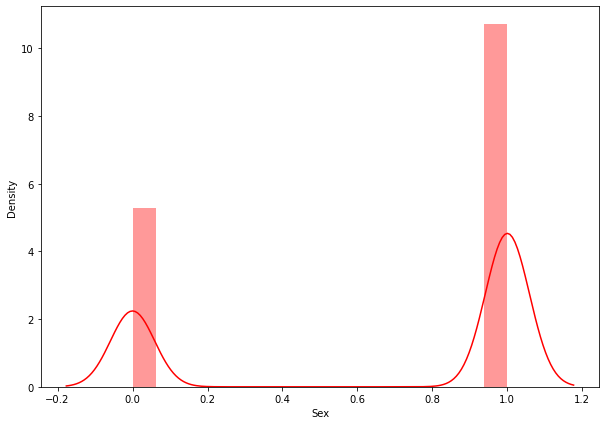

Capital_gain
11.953139157554617


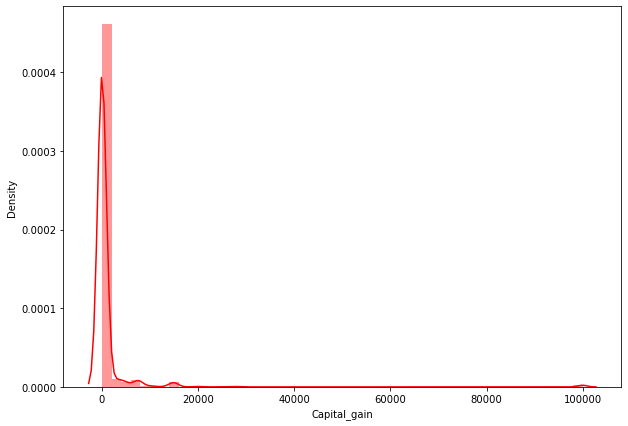

Capital_loss
4.594337190555792


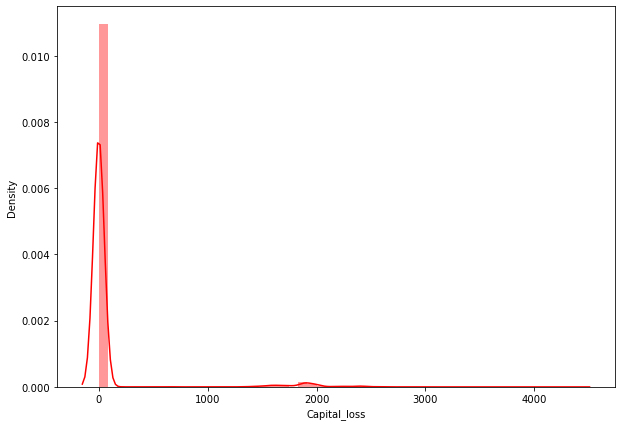

Hours_per_week
0.2276253044722967


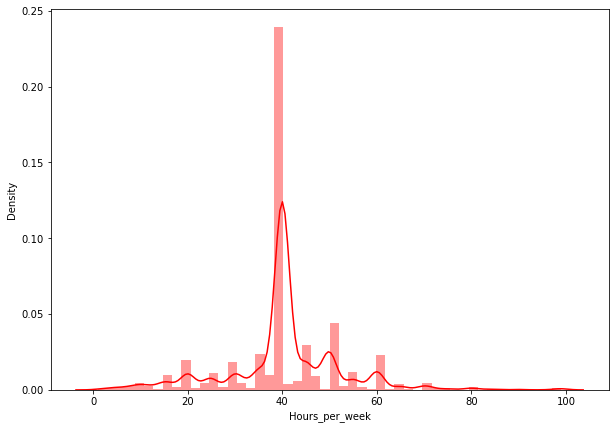

Native_country
-3.658066813887923


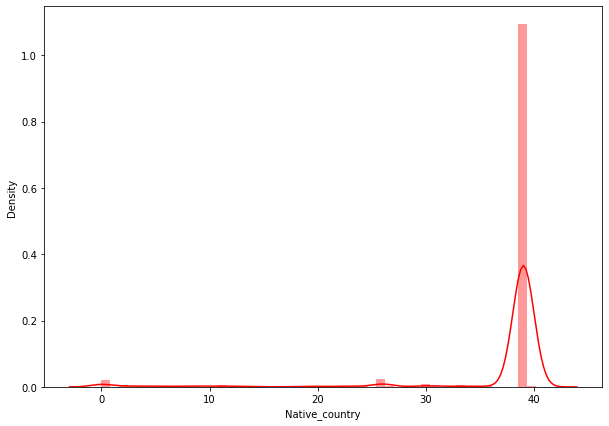

Income
1.212327081863191


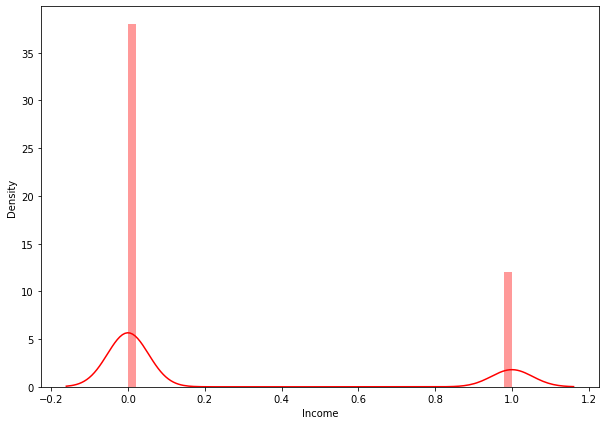

In [547]:
for i in cc:
    print(i)
    print(skew(cc[i]))
    
    plt.figure(figsize=(10,7))
    sns.distplot(cc[i],color='red')
    plt.show()

### Observation-6

From the above graphs and results we can conclude that 10 columns has skewness...

1) Workclass(-0.75) has negative skewness.

2) Fnlwgt(1.44) and relationship(0.78) columns shows skewd data or we can say that skewness is present in these columns.

3) Education(-0.93), Race(-2.43), Sex(-0.71) and native country columns data are skewd in the negative way.

4) Income(1.21), capital loss(4.59) and capital gain(11.95) columns data are highly skewed or we can say the high skewness is present in these columns.

## Checking Correlation
### 2) Correlation of each columns with target column.

In [548]:
cc.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

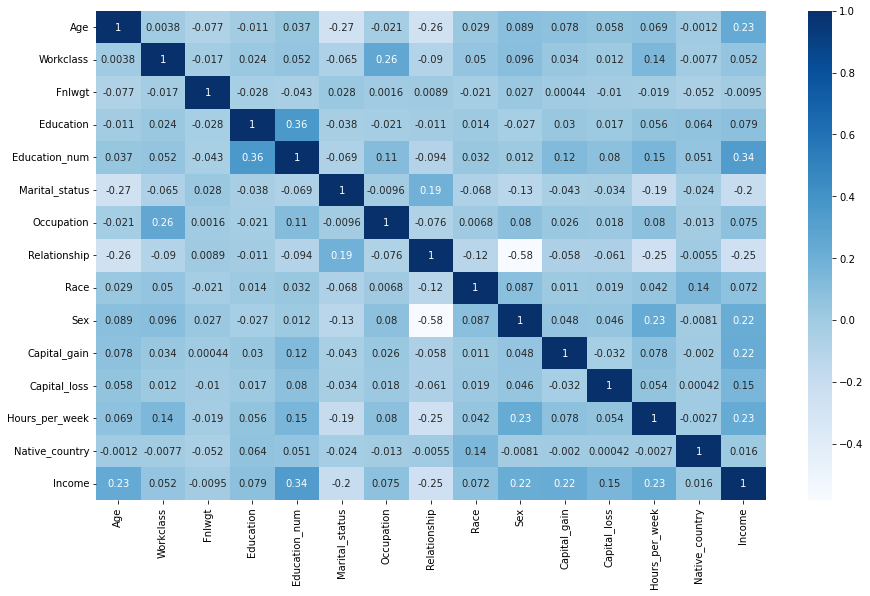

In [549]:
plt.figure(figsize=[15,9])
sns.heatmap(cc.corr(),cmap='Blues',annot=True)
plt.show()

<AxesSubplot:>

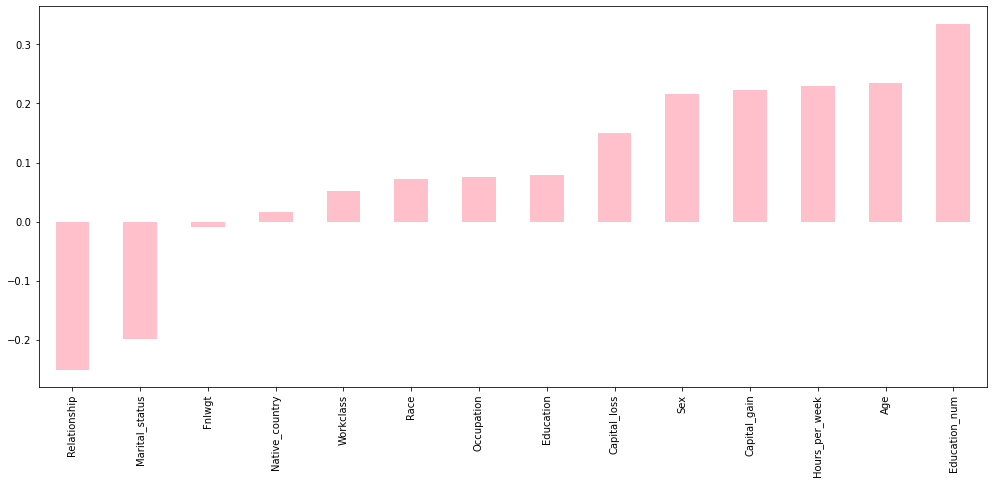

In [550]:
plt.figure(figsize=(17,7))
cc.corr()['Income'].sort_values().drop(['Income']).plot(kind='bar',color='pink')

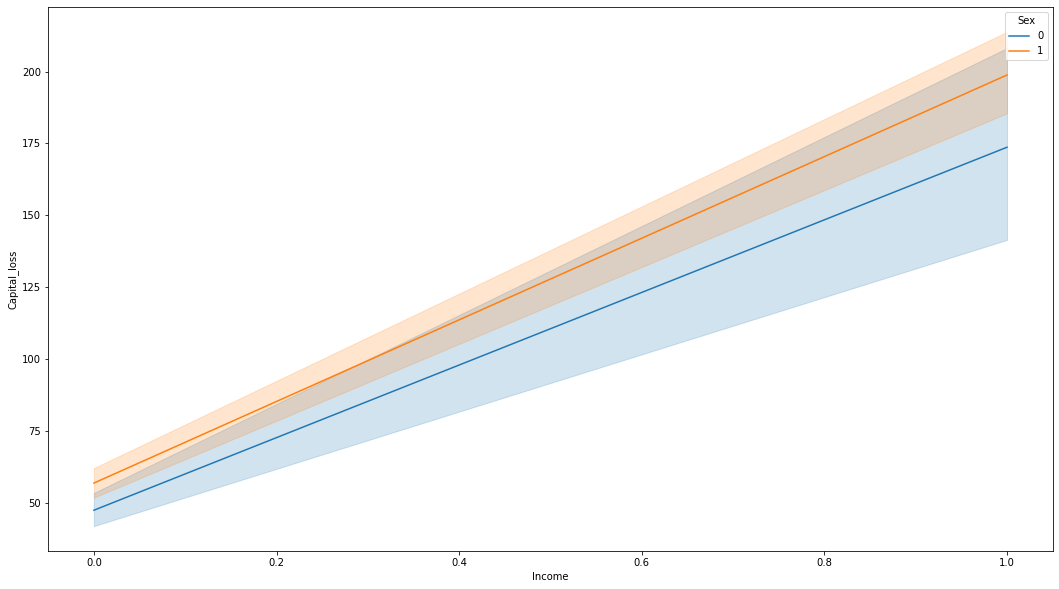

In [551]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Income", y="Capital_loss", hue='Sex', data=cc)
plt.show()

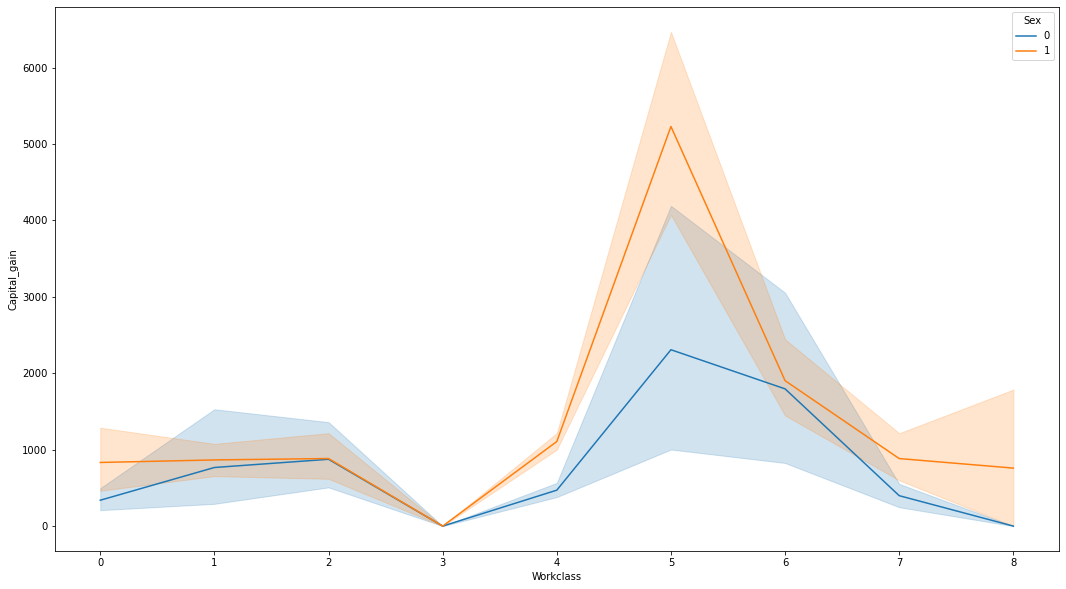

In [552]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Workclass", y="Capital_gain", hue='Sex', data=cc)
plt.show()

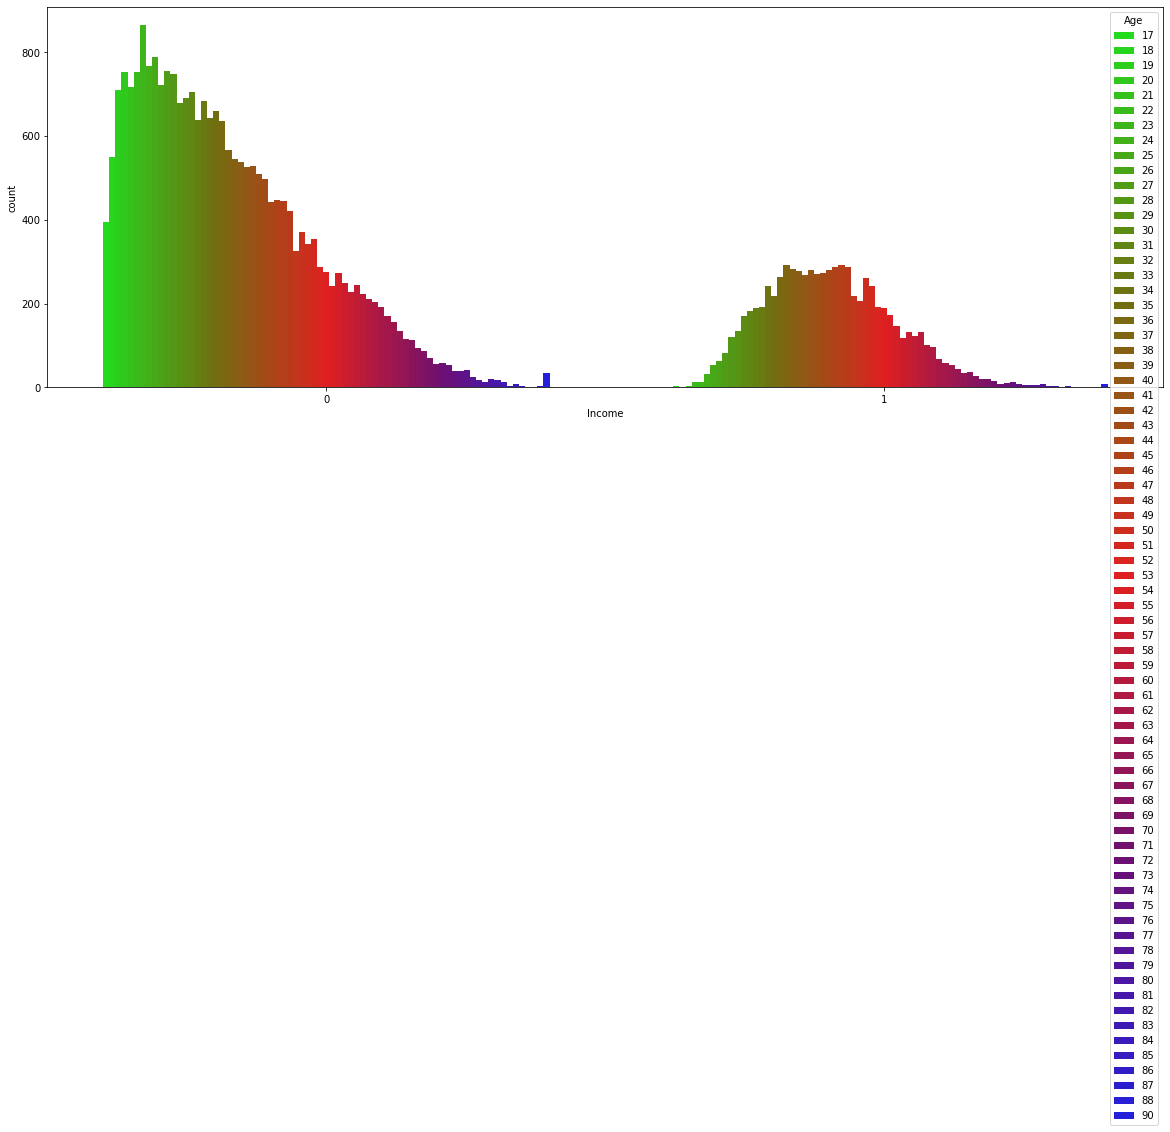

In [553]:
plt.figure(figsize=[20,7])
sns.countplot(cc['Income'],hue=cc['Age'],palette='brg_r')
plt.show()                                      0-less    1-greter

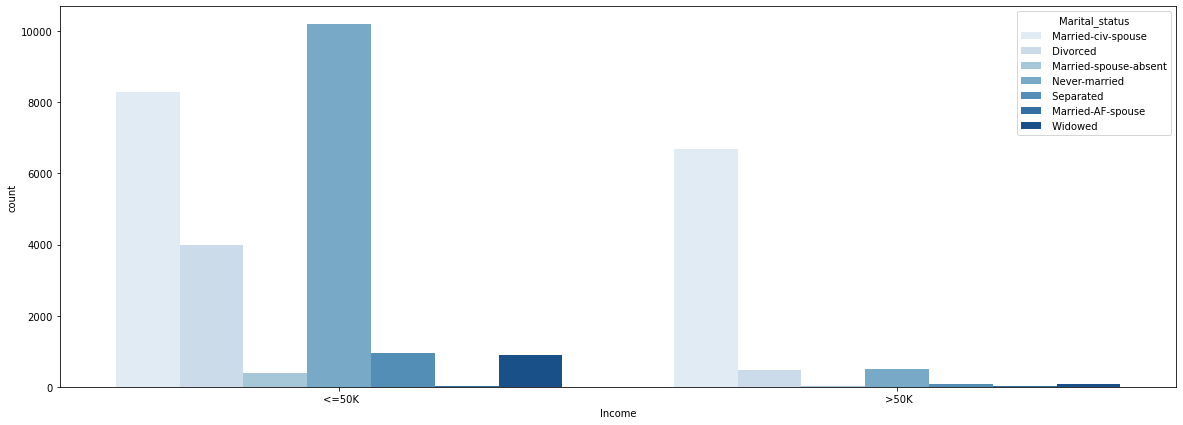

In [4]:
plt.figure(figsize=[20,7])
sns.countplot(cc['Income'],hue=cc['Marital_status'],palette='Blues')
plt.show()


<AxesSubplot:xlabel='Income', ylabel='count'>

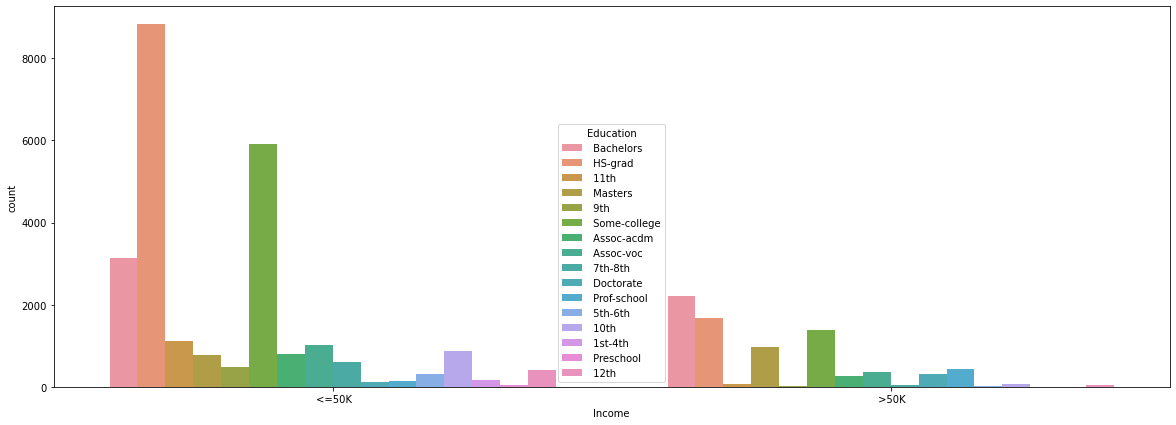

In [5]:
plt.figure(figsize=[20,7])
sns.countplot(cc['Income'],hue=cc['Education'])

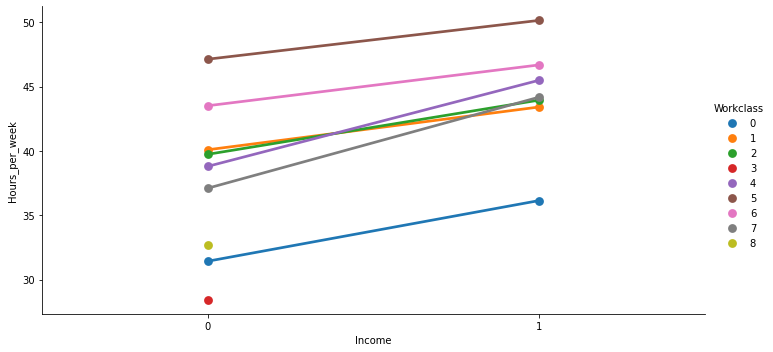

In [556]:
sns.factorplot(x = 'Income', y = 'Hours_per_week', hue = 'Workclass', data=cc, aspect= 2, ci=None)

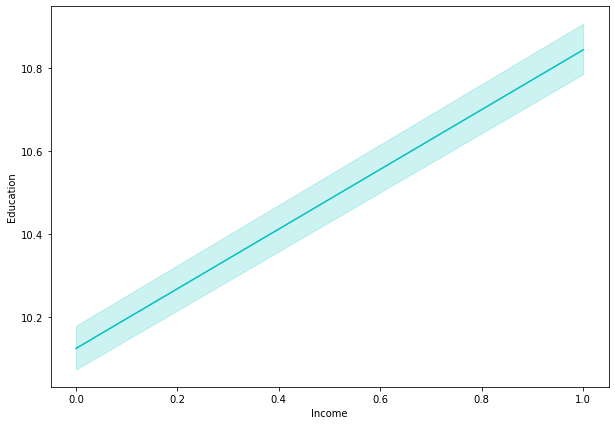

In [557]:
plt.figure(figsize=[10,7])
sns.lineplot(data=cc,x='Income',y='Education',color='c')
plt.show()

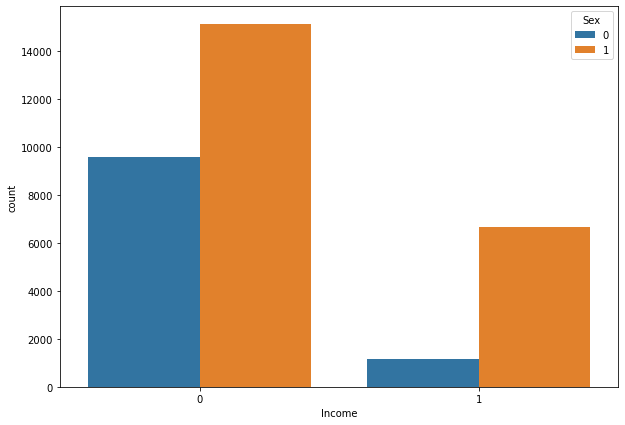

In [558]:
plt.figure(figsize=[10,7])
sns.countplot(cc['Income'],hue=cc['Sex'])
plt.show()

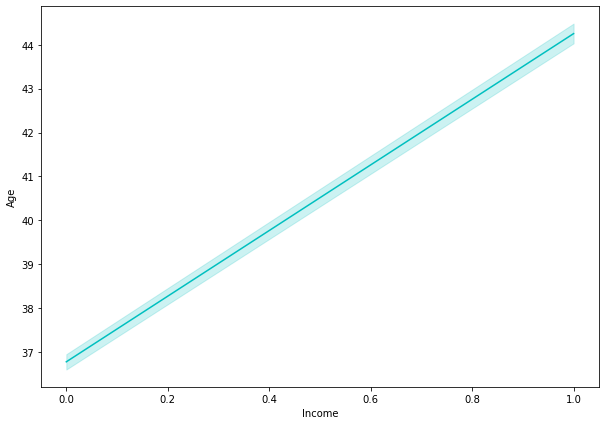

In [559]:
plt.figure(figsize=[10,7])
sns.lineplot(data=cc,x='Income',y='Age',color='c')
plt.show()

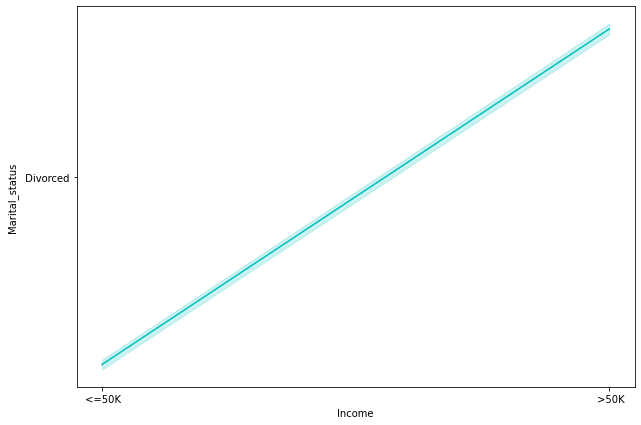

In [6]:
plt.figure(figsize=[10,7])
sns.lineplot(data=cc,x='Income',y='Marital_status',color='c')
plt.show()

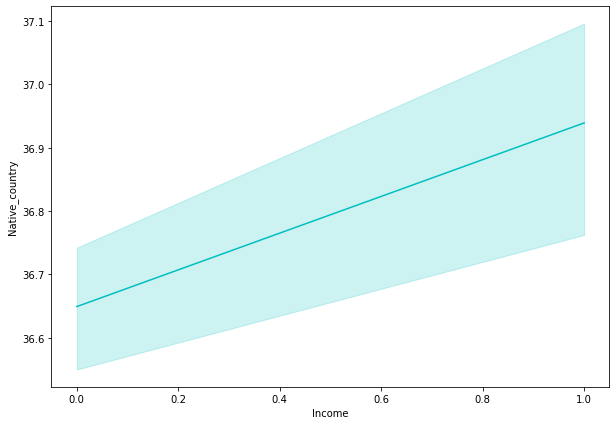

In [561]:
plt.figure(figsize=[10,7])
sns.lineplot(data=cc,x='Income',y='Native_country',color='c')
plt.show()

### Observation-7

1) All the columns has positive correlation with target column excluding relationship and marital status.

2) Age(0.23), capital gain(0.22), Sex(0.22) and hours per week(0.23) columns are making good correlationship with target columns, which can be considered as a good bond.

3) Education num column making 34% correlation with the target column.

4) capital loss and income graphs shows that both are directly proportional to each other, when the income is increasing then capital loss is also increasing.

5) As we can see most of the people who's age is 17-30, are earning less then 50,000.

6) only few people are there who's age is above 70, are earning less then 50,000.

7) If we compare the people income, most of the people are earning less then 50,000 and some people are there only whom salary is above 50,000.

8) planty of the people who belongs to HS-grad and some college education, income is less then 50,000 but the fact is that most of the people are earning less then 50,000 dollar only few people are there who earns above 50,000. 

9) most of the Never married people and Married-civ-spouse are earning less then 50,000 dollar and seperated and widow population is less whome salary is less then 50,000.Married-AF-spouse people are earning more then 50,000 dollar.

10) Level of education is increasing the income of people, means education and income is directly proportional to each other.

11) When the age is increasing simultaneously income is incresaing.

## Data preprocessing

## Data Cleaning

In [562]:
x=cc.iloc[:,0:-1]
y=cc.iloc[:,-1]

In [563]:
x.shape

(32560, 14)

In [564]:
y.shape

(32560,)

In [565]:
col=x.columns

## Removing outliers

In [566]:
from scipy.stats import zscore

In [567]:
z=np.abs(zscore(x))
z.shape

(32560, 14)

In [568]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [569]:
x=x[(z<3).all(axis=1)]

In [570]:
y=y[(z<3).all(axis=1)]

In [571]:
x.shape

(27417, 14)

In [572]:
y.shape

(27417,)

## Removing skewness

In [573]:
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

In [574]:
from sklearn.preprocessing import power_transform

In [575]:
x=power_transform(x,method='yeo-johnson')

In [576]:
x=pd.DataFrame(x,columns=col)

In [577]:
x.skew()

Age               -0.018272
Workclass          0.073827
Fnlwgt            -0.035195
Education         -0.314997
Education_num      0.028000
Marital_status    -0.128651
Occupation        -0.182675
Relationship       0.108587
Race              -2.533505
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week     0.104401
Native_country     0.777698
dtype: float64

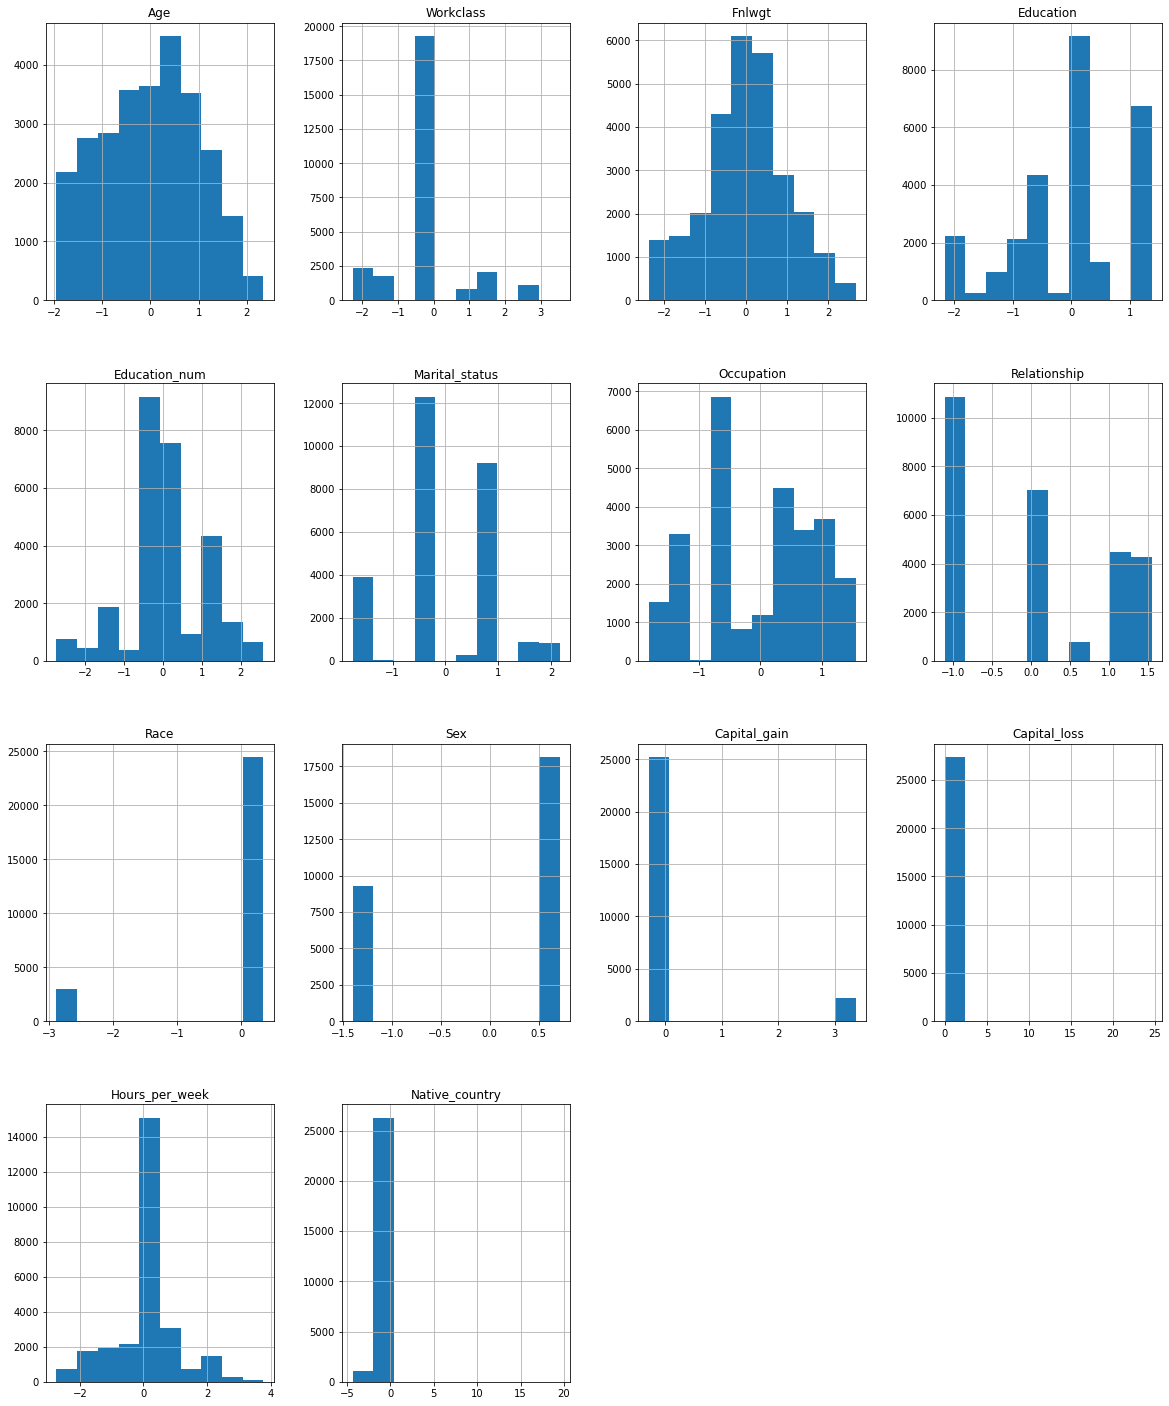

In [578]:
x.hist(figsize=(20,25))
plt.show()

## Scaling the data using MinMax scaler

In [580]:
from sklearn.preprocessing import MinMaxScaler

In [581]:
mm=MinMaxScaler()

In [582]:
x=mm.fit_transform(x)

In [583]:
x=pd.DataFrame(x,columns=col)

In [584]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.668858,0.676034,0.247874,0.473017,0.747178,0.350957,0.396291,0.000000,1.0,1.0,0.0,0.0,0.079961,1.893325e-01
1,0.484163,0.394452,0.552551,0.633240,0.427473,0.000000,0.540481,0.456102,1.0,1.0,0.0,0.0,0.414062,1.893325e-01
2,0.709400,0.394452,0.588237,0.026042,0.276710,0.350957,0.540481,0.000000,0.0,1.0,0.0,0.0,0.414062,1.893325e-01
3,0.466758,0.394452,0.675790,0.719341,0.830326,0.350957,0.396291,1.000000,1.0,0.0,0.0,0.0,0.414062,1.893325e-01
4,0.654911,0.394452,0.439736,0.265288,0.133548,0.517764,0.669167,0.456102,0.0,0.0,0.0,0.0,0.111273,5.127223e-09



### Variance inflation factor:

In [585]:
import statsmodels.api as si
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [586]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [588]:
vif(x)

,Variables,VIF Factor
0,Age,5.179016
1,Workclass,6.511625
2,Fnlwgt,5.928465
3,Education,6.010004
4,Education_num,9.660995
5,Marital_status,4.311527
6,Occupation,4.686066
7,Relationship,3.479746
8,Race,8.649099
9,Sex,4.460947


## Balancing the target column using SMOTE


In [589]:
from imblearn.over_sampling import SMOTE

In [590]:
smt=SMOTE()

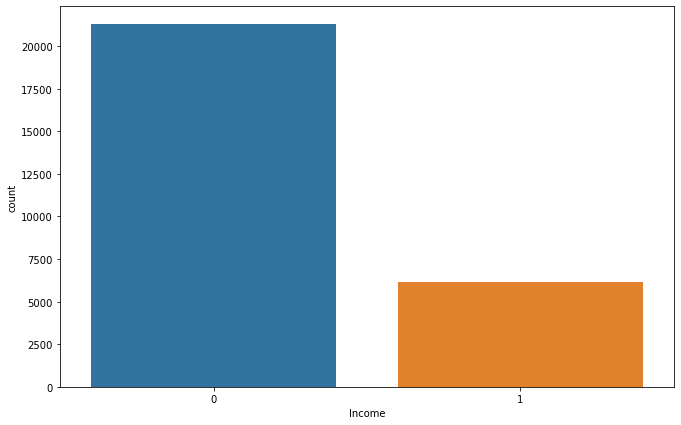

In [591]:
plt.figure(figsize=[11,7])
sns.countplot(y)
plt.show()

In [593]:
x,y=smt.fit_resample(x,y)

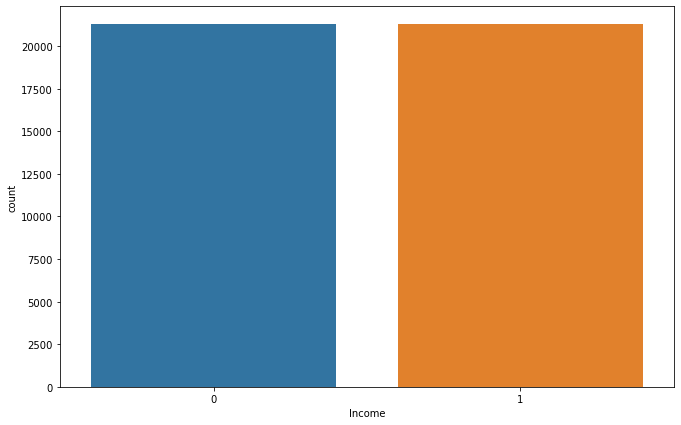

In [596]:
plt.figure(figsize=[11,7])
sns.countplot(y)
plt.show()

In [594]:
x.shape

(42558, 14)

In [595]:
y.shape

(42558,)

# Model learning phase-prediction

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target. Here we are going to use classification model because our target column is catagorical in nature.

For classification model, Some matrix we are going to find like:
    
    * Confusion matrix
    * Accuracu Score
    * Classification report
    

### Models

* Decision Tree classifier
* KNeighbors classifier
* Support vectod machine classifier
* Random Forest classifier

### For bagging and boosting :

* AdaBoost classifier
* Gradient Boosting classifier
* XGboost classifier
* Naive bayes classifier

In [618]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xg

## Creating a function for finding Best random state

In [598]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))  

## Logistic Regression
Finding best random state by calling model_select function

In [599]:
model_select(LogisticRegression)

Max score is 0.7878884972765139 at random state 20


In [600]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=20)

In [601]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7878884972765139
[[3554 1037]
 [ 949 3823]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4591
           1       0.79      0.80      0.79      4772

    accuracy                           0.79      9363
   macro avg       0.79      0.79      0.79      9363
weighted avg       0.79      0.79      0.79      9363



In [606]:
for i in range(9,19):
    cvs=cross_val_score(lr,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 9 --- 0.7746609663581893
cross validation when cv = 10 --- 0.7748723306503627
cross validation when cv = 11 --- 0.7748249203435644
cross validation when cv = 12 --- 0.7746608961718534
cross validation when cv = 13 --- 0.7746846343228584
cross validation when cv = 14 --- 0.7748017702820723
cross validation when cv = 15 --- 0.7748957469871308
cross validation when cv = 16 --- 0.7748016295203974
cross validation when cv = 17 --- 0.7748724270961296
cross validation when cv = 18 --- 0.7748016902189963


In [607]:
cvlr=10
Modellr=78.78
Cslr= 77.48
Diffrencelr= 78.78-77.48

### Kneighbors classifier
Finding best random state by calling model_select function

In [609]:
model_select(KNeighborsClassifier)

Max score is 0.8623304496422087 at random state 58


In [620]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=58)

In [621]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8623304496422087
[[3674 1009]
 [ 280 4400]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      4683
           1       0.81      0.94      0.87      4680

    accuracy                           0.86      9363
   macro avg       0.87      0.86      0.86      9363
weighted avg       0.87      0.86      0.86      9363



In [622]:
for i in range(9,19):
    cvs=cross_val_score(knn,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 9 --- 0.8599798940912954
cross validation when cv = 10 --- 0.8615540264439007
cross validation when cv = 11 --- 0.8617651490468138
cross validation when cv = 12 --- 0.8621421983407304
cross validation when cv = 13 --- 0.862376782078826
cross validation when cv = 14 --- 0.8624469305049395
cross validation when cv = 15 --- 0.8620950427788637
cross validation when cv = 16 --- 0.8619767911222207
cross validation when cv = 17 --- 0.8620723539946012
cross validation when cv = 18 --- 0.8622369367145661


In [623]:
cvknn=18
Modelknn=86.23
Csknn= 86.22
Diffrenceknn= 86.23-86.22

### Naive bayes classifier
Finding best random state by calling model_select function

In [619]:
model_select(GaussianNB)

Max score is 0.7756061091530493 at random state 20


In [624]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=20)

In [625]:
mn=GaussianNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7756061091530493
[[3202 1389]
 [ 712 4060]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      4591
           1       0.75      0.85      0.79      4772

    accuracy                           0.78      9363
   macro avg       0.78      0.77      0.77      9363
weighted avg       0.78      0.78      0.77      9363



In [626]:
for i in range(8,20):
    cvr=cross_val_score(mn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 8 --- 0.7606326916063424
Cross validation when cv= 9 --- 0.7607737024883683
Cross validation when cv= 10 --- 0.7605151557654417
Cross validation when cv= 11 --- 0.7607967397920711
Cross validation when cv= 12 --- 0.7607972438226862
Cross validation when cv= 13 --- 0.760914610748902
Cross validation when cv= 14 --- 0.7608908283789434
Cross validation when cv= 15 --- 0.7610557377597568
Cross validation when cv= 16 --- 0.7607966506855706
Cross validation when cv= 17 --- 0.7610088998257531
Cross validation when cv= 18 --- 0.7608677873847276
Cross validation when cv= 19 --- 0.7607965487915859


In [627]:
cvgn=17
Modelgnr=77.56
Csgn= 76.10
Diffrencegn= 77.56-76.10

### Decision tree classifier
Finding best random state by calling model_select function

In [628]:
model_select(DecisionTreeClassifier)

Max score is 0.8608352023923956 at random state 24


In [629]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=24)

In [630]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8581651180177293
[[3943  677]
 [ 651 4092]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4620
           1       0.86      0.86      0.86      4743

    accuracy                           0.86      9363
   macro avg       0.86      0.86      0.86      9363
weighted avg       0.86      0.86      0.86      9363



In [631]:
for i in range(7,20):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8487491141078556
Cross validation when cv= 8 --- 0.8537539518211774
Cross validation when cv= 9 --- 0.8538254300555814
Cross validation when cv= 10 --- 0.8569262775770212
Cross validation when cv= 11 --- 0.8551395273324922
Cross validation when cv= 12 --- 0.8574464859473353
Cross validation when cv= 13 --- 0.8569278127041512
Cross validation when cv= 14 --- 0.8565264886673744
Cross validation when cv= 15 --- 0.8575650182506426
Cross validation when cv= 16 --- 0.8588763919247159
Cross validation when cv= 17 --- 0.8584364239327016
Cross validation when cv= 18 --- 0.8575924812998357
Cross validation when cv= 19 --- 0.8581949514250119


In [660]:
cvdtc=19
Modeldtc=85.81
Csdtc= 85.81
Diffrencedtc= 85.81-85.81

## Ensamble technique --
### Bagging and boosting

## Random forest classifier
Finding best random state by calling model_select function

In [634]:
model_select(RandomForestClassifier)

Max score is 0.9063334401367084 at random state 74


In [635]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=74)

In [636]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9056926198867884
[[4153  509]
 [ 374 4327]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4662
           1       0.89      0.92      0.91      4701

    accuracy                           0.91      9363
   macro avg       0.91      0.91      0.91      9363
weighted avg       0.91      0.91      0.91      9363



In [637]:
for i in range(7,20):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.9018763674897065
Cross validation when cv= 8 --- 0.9032157072390508
Cross validation when cv= 9 --- 0.9017831021154825
Cross validation when cv= 10 --- 0.9031218137882897
Cross validation when cv= 11 --- 0.9027216502630947
Cross validation when cv= 12 --- 0.9030304413226138
Cross validation when cv= 13 --- 0.9044858812606482
Cross validation when cv= 14 --- 0.9040146098835439
Cross validation when cv= 15 --- 0.9042296546300937
Cross validation when cv= 16 --- 0.903850149301422
Cross validation when cv= 17 --- 0.9051709927038879
Cross validation when cv= 18 --- 0.9047728296223162
Cross validation when cv= 19 --- 0.9044140925392983


In [640]:
cvrfc=18
Modelrfc= 90.63
Csrfc= 90.47
Diffrencerfc=90.63-90.47

## AdaBoostClassifier
Finding best random state by calling model_select function

In [638]:
model_select(AdaBoostClassifier)

Max score is 0.8541065897682367 at random state 69


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=69)

In [641]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8458827298942646
[[3846  816]
 [ 627 4074]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4662
           1       0.83      0.87      0.85      4701

    accuracy                           0.85      9363
   macro avg       0.85      0.85      0.85      9363
weighted avg       0.85      0.85      0.85      9363



In [642]:
for i in range(7,14):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8427799094503821
Cross validation when cv= 8 --- 0.8440722196424507
Cross validation when cv= 9 --- 0.8445659521393222
Cross validation when cv= 10 --- 0.8444951372997712
Cross validation when cv= 11 --- 0.844494605493589
Cross validation when cv= 12 --- 0.844449714369279
Cross validation when cv= 13 --- 0.8448483191171605


In [659]:
cvada=13
Modelada = 84.58
Csada= 84.48
Diffrenceada=84.58-84.48

## GradientBoostingClassifier
Finding best random state by calling model_select function

In [639]:
model_select(GradientBoostingClassifier)

Max score is 0.8693794723913275 at random state 95


In [645]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=95)

In [646]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8693794723913275
[[3911  765]
 [ 458 4229]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.86      4676
           1       0.85      0.90      0.87      4687

    accuracy                           0.87      9363
   macro avg       0.87      0.87      0.87      9363
weighted avg       0.87      0.87      0.87      9363



In [647]:
for i in range(7,14):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 7 --- 0.8605441457216821
Cross validation when cv= 8 --- 0.8616955132826426
Cross validation when cv= 9 --- 0.8613904255506508
Cross validation when cv= 10 --- 0.8611080285908661
Cross validation when cv= 11 --- 0.8617653009133643
Cross validation when cv= 12 --- 0.8613210534146436
Cross validation when cv= 13 --- 0.8616258852688194


In [648]:
cvgbc=11
Modelgbc= 86.93
Csgbc= 86.17
Diffrencegbc =86.93-86.17

## Xg boost Classifier
Finding best random state by calling model_select function

In [649]:
model_select(xg.XGBClassifier)

Max score is 0.9133824628858271 at random state 80


In [650]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=80)

In [651]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9133824628858271
[[4282  397]
 [ 414 4270]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4679
           1       0.91      0.91      0.91      4684

    accuracy                           0.91      9363
   macro avg       0.91      0.91      0.91      9363
weighted avg       0.91      0.91      0.91      9363



In [653]:
for i in range(7,14):
    cvr=cross_val_score(xb,x,y,cv=i)
    print("Cross validation when cv=",i,'---',cvr.mean())

Cross validation when cv= 7 --- 0.8922905390738732
Cross validation when cv= 8 --- 0.8961204565983487
Cross validation when cv= 9 --- 0.8991056272730636
Cross validation when cv= 10 --- 0.8987755338699275
Cross validation when cv= 11 --- 0.8998083456282466
Cross validation when cv= 12 --- 0.9010591157561717
Cross validation when cv= 13 --- 0.9020675117134347


In [654]:
cvxg=13
Modelxg=91.33
Csxg=90.20
Diffrencexg=91.33-90.20

## Comparison of all the models

In [669]:
kk={'CV':[cvlr,cvknn,cvgn,cvdtc,cvrfc,cvada,cvxg,cvgbc],
                 'Model_accuracy':[Modellr,Modelknn,Modelgnr,Modeldtc,Modelrfc,Modelada,Modelxg,Modelgbc],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdtc,Csrfc,Csada,Csxg,Csgbc],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedtc,Diffrencerfc,Diffrenceada,Diffrencexg,Diffrencegbc]
 }

In [672]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GussianNB','Decision tree',
                              'Random forest','Adaboost','xgboost','Gradient boosting'])

In [673]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,10,78.78,77.48,1.30
kneighbour,18,86.23,86.22,0.01
GussianNB,17,77.56,76.10,1.46
Decision tree,19,85.81,85.81,0.00
Random forest,18,90.63,90.47,0.16
Adaboost,13,84.58,84.48,0.10
xgboost,13,91.33,90.20,1.13
Gradient boosting,11,86.93,86.17,0.76


## Best Model
### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing RFC
### Model accuracy is : 90.63
### Cross_validation score : 90.47
### Diffrence : 0.16

## Hyper Parameter tuning
## Grid search cv

In [717]:
parameter={'n_estimators':[11,13,17,19],
           'criterion':['gini', 'entropy'],
           'max_depth':[20,22,24,26],
            'max_features':['sqrt', 'log2']
           }

In [718]:
GSC=GridSearchCV(rfc,parameter,cv=17)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'max_features': 'sqrt',
 'n_estimators': 19}

In [719]:
GSC.best_estimator_

RandomForestClassifier(max_depth=26, n_estimators=19)

In [720]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.8983231870127096

In [724]:
tune_rfc=RandomForestClassifier(max_depth=26, n_estimators=19)
tune_rfc.fit(x_train,y_train)
pred=tune_rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8987504005126562
[[4076  595]
 [ 353 4339]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      4671
           1       0.88      0.92      0.90      4692

    accuracy                           0.90      9363
   macro avg       0.90      0.90      0.90      9363
weighted avg       0.90      0.90      0.90      9363



## we have done with Grid search CV and we got our best model Random forest classifier with 89.87 % accuracy.

# Accuracy= 90%

.

## AUC-ROC Curve

##### AUC-ROC curve is the graphical representation of confusion matrix.

In [725]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [727]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [728]:
y_pred_prob

array([0.47368421, 0.6394334 , 0.        , ..., 0.68421053, 0.99685589,
       0.05263158])

In [729]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

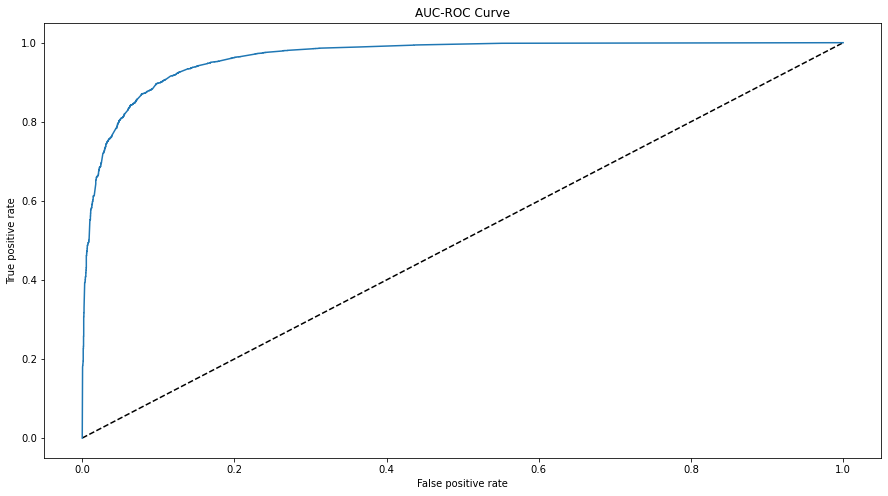

In [731]:
plt.figure(figsize=[15,8])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("AUC-ROC Curve")
plt.show()

In [733]:
auc_score=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))
print((auc_score))

0.8982762033354851


### AUC-ROC curve score is 89.82 %

#### Saving the model

In [734]:
import joblib

In [735]:
joblib.dump(tune_rfc,"Census_income.pkl")

['Census_income.pkl']

## Prediction

In [736]:
model=joblib.load('Census_income.pkl')

In [737]:
prediction=model.predict(x_test)

In [738]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,...,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362
Predict,1,1,0,1,0,1,1,1,0,0,...,1,1,1,1,1,0,1,0,1,0
Original,1,1,0,1,0,0,1,1,0,0,...,1,1,1,1,1,0,1,0,1,0


# Conclusion :

From the above observations we are concluding that

1) We had not many null values in data set, So we did not used simple imputer technique.

2) In order to replace the object data to the int values we used encoading technique.

3) In our data set Some skewness and outliers was present, To remove this we used zscore method for outliers removing and power transformation method for skewness removing.

4) For scaling the data set we used Min Max scaling technique.

5) Our data set was imbalanced, for balancing it SMOTE has been used.

We used many classifier for predicting -

like-

A) k nearest neighbour classifier
B) Naive bayes classifier(GaussianNB)
C) Design tree classifier
D) Support vector machine classifier 

6) In order to control overfitting and underfitting we adopted Cross validation.

7) For Bagging and boosting we have used Random forest classifier,Adaboost classifier, Xg boost classifier and Gradient boosting classifier.

8) We have plotted AUC-ROC curve to plot confusion matrix and the Score of AUC-ROC curve is 89.82 %.

9) We worked on Hyper parameter tuning on random forest classifier for boosting our model accuracy.

Finally we got Our best model Which is random forest classifier, it gave the 90 % accuracy. Which can be considered as good accuracy.

### Now our model is ready to predict.
## Accuracy- 90%
## Model- Random Forest Classifier